# CIFAR-100-New


## 一、构造

参考论文附录部分

In [5]:
import warnings

warnings.filterwarnings("ignore")

## 二、验证


In [4]:
!pwd
!tree ../data/cifar-100/gen/

/nvme/szh/code/tta-mr/result_analysis
../data/cifar-100/gen/
├── nr_0.1_nt_asymmetric_balanced
│   ├── aux_data.npy
│   ├── aux_label.npy
│   ├── inc_data.npy
│   ├── inc_label.npy
│   ├── step_0
│   │   ├── train_data.npy
│   │   └── train_label.npy
│   ├── step_1
│   │   ├── train_data.npy
│   │   └── train_label.npy
│   ├── step_2
│   │   ├── train_data.npy
│   │   └── train_label.npy
│   ├── step_3
│   │   ├── train_data.npy
│   │   └── train_label.npy
│   ├── test_data.npy
│   ├── test_label.npy
│   ├── train_data.npy
│   └── train_label.npy
├── nr_0.2_nt_asymmetric_balanced
│   ├── aux_data.npy
│   ├── aux_label.npy
│   ├── inc_data.npy
│   ├── inc_label.npy
│   ├── step_0
│   │   ├── train_data.npy
│   │   └── train_label.npy
│   ├── step_1
│   │   ├── conf_data.npy
│   │   ├── conf_label.npy
│   │   ├── train_data.npy
│   │   └── train_label.npy
│   ├── step_2
│   │   ├── conf_data.npy
│   │   ├── conf_label.npy
│   │   ├── train_data.npy
│   │   └── train_label.npy
│   ├── ste

In [1]:
!tree ../ckpt/cifar-10/

../ckpt/cifar-10/
├── nr_0.2_nt_symmetric
│   └── step_0
│       └── contra
│           └── cifar-resnet18_worker_restore.pth
├── nr_0.2_nt_symmetric_balanced
│   ├── pretrain
│   │   └── step_0
│   │       └── cifar-resnet18_worker_restore.pth
│   ├── step_0
│   │   ├── cifar-resnet18_teacher_restore.pth
│   │   ├── cifar-resnet18_worker_restore.pth
│   │   ├── contra
│   │   │   ├── cifar-resnet18_teacher_restore.pth
│   │   │   └── cifar-resnet18_worker_restore.pth
│   │   ├── coteaching
│   │   │   └── cifar-resnet18_worker_restore.pth
│   │   ├── coteaching_plus
│   │   │   └── cifar-resnet18_worker_restore.pth
│   │   ├── cotta
│   │   │   └── cifar-resnet18_worker_restore.pth
│   │   ├── jocor
│   │   │   └── cifar-resnet18_worker_restore.pth
│   │   ├── plf
│   │   │   └── cifar-resnet18_worker_restore.pth
│   │   ├── raw
│   │   │   └── cifar-resnet18_worker_restore.pth
│   │   └── replay
│   │       └── cifar-resnet18_worker_restore.pth
│   ├── step_1
│   │   ├── cifar-resnet

### 公共函数


In [1]:
# 函数用于加载每个版本的 D_tr 数据集
def load_d_tr(version, base_dir):
    data_path = os.path.join(base_dir, f"step_{version}", "train_data.npy")
    labels_path = os.path.join(base_dir, f"step_{version}", "train_label.npy")

    data = np.load(data_path)
    labels = np.load(labels_path)

    # 验证数据形状和标签范围
    print(f"版本 {version}:")
    print(f"数据形状: {data.shape}, 标签形状: {labels.shape}")
    print(f"标签唯一值: {np.unique(labels)}")

    return data, labels

### 标签分布

验证 base_dir 数据集:
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 1:
数据形状: (944, 3, 224, 224), 标签形状: (944,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 2:
数据形状: (765, 3, 224, 224), 标签形状: (765,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 3:
数据形状: (587, 3, 224, 224), 标签形状: (587,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 1:
数据形状: (944, 3, 224, 224), 标签形状: (944,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 2:
数据形状: (765, 3, 224, 224), 标签形状: (765,

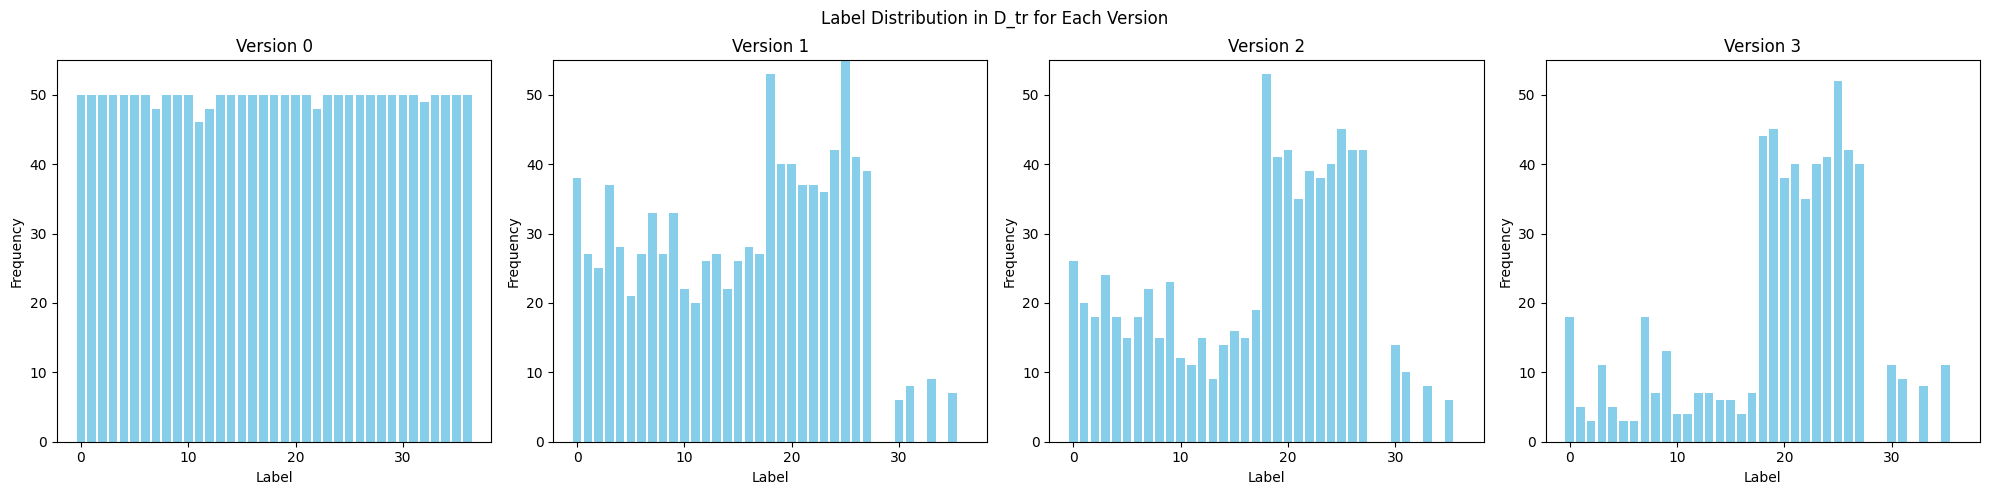

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

# 设置增量版本和类的数量
num_versions = 4  
num_classes = 37  # PET-37 共有 37 个类


# 验证每个版本 D_tr 的标签分布变化并统一纵坐标
def plot_label_distribution(base_dir):
    plt.style.use("default")
    fig, axs = plt.subplots(1, num_versions, figsize=(20, 5))
    fig.suptitle("Label Distribution in D_tr for Each Version")

    max_count = 0  # 初始化最大频率值

    # 计算所有版本中的最大频率值
    for version in range(num_versions):
        _, labels = load_d_tr(version, base_dir)
        _, counts = np.unique(labels, return_counts=True)
        max_count = max(max_count, max(counts))

    # 绘图并设置统一的纵坐标
    for version in range(num_versions):
        _, labels = load_d_tr(version, base_dir)
        unique, counts = np.unique(labels, return_counts=True)

        # 为了保持 x 轴一致，确保横坐标是从 0 到 99（共100个类）
        full_counts = np.zeros(num_classes)
        full_counts[unique] = counts  # 填充实际的计数值

        axs[version].bar(range(num_classes), full_counts, color="skyblue")
        axs[version].set_title(f"Version {version}")
        axs[version].set_xlabel("Label")
        axs[version].set_ylabel("Frequency")
        axs[version].set_xticks(
            range(0, num_classes, 10)
        )  # 保证横轴一致，每隔 10 个类显示一次
        axs[version].set_ylim(0, max_count)  # 设置统一的纵坐标最大值

    plt.tight_layout()
    fig.subplots_adjust(top=0.88)  # 调整顶部以避免标题与图形重叠
    plt.show()


# 定义数据集的路径
base_dir = "../data/pet-37/gen/nr_0.2_nt_asymmetric_balanced"
print("验证 base_dir 数据集:")
plot_label_distribution(base_dir)

结果解释

根据输出结果来看，生成的数据符合预期：

1. **版本 0 到 3 的数据形状和标签数量**：

   - 数据量在每个版本中逐步减少，符合模拟遗忘的逻辑。
   - 版本 0 有 25000 条数据，版本 1 有 12500 条数据，版本 2 有 10000 条数据，版本 3 有 7500 条数据，数据量按预期减少。

2. **标签唯一值的变化**：
   - 在版本 0 中，所有 100 个类的标签均存在，这表明初始数据集包含了所有类别。
   - 从版本 1 开始，标签唯一值减少。例如，版本 1 到 3 中某些标签（如 76, 77, 78 等）消失。这符合遗忘类被移除的逻辑。

这种逐步减少类标签的情况表明，代码成功地对某些类别进行了遗忘模拟，符合增量学习和遗忘机制的设计目标。


### 验证遗忘


#### 条形图


验证 base_dir 数据集:
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 0: 遗忘类数量: 0, 遗忘类: set()
版本 1:
数据形状: (944, 3, 224, 224), 标签形状: (944,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 1: 遗忘类数量: 5, 遗忘类: {32, 34, 36, 28, 29}
版本 2:
数据形状: (765, 3, 224, 224), 标签形状: (765,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 2: 遗忘类数量: 5, 遗忘类: {32, 34, 36, 28, 29}
版本 3:
数据形状: (587, 3, 224, 224), 标签形状: (587,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 3: 遗忘类数量: 5, 遗忘类: {32, 34, 36, 28, 29}


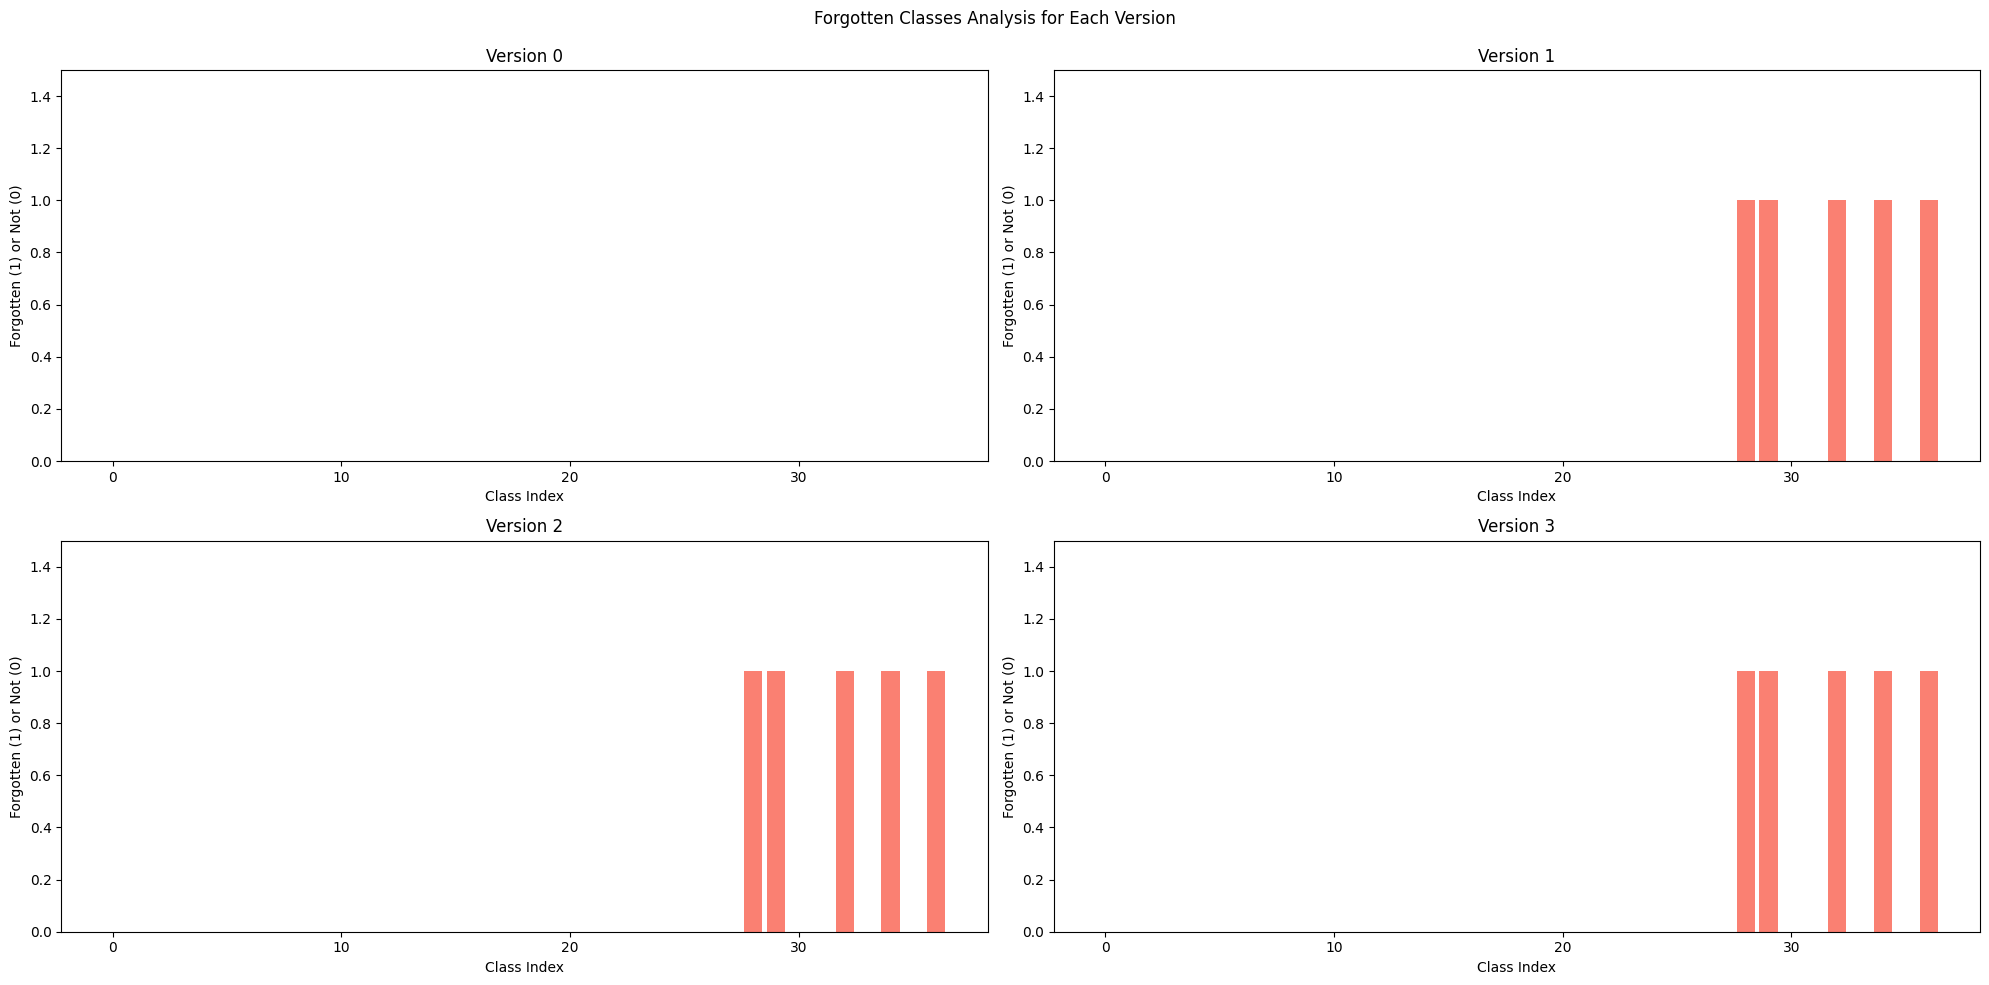

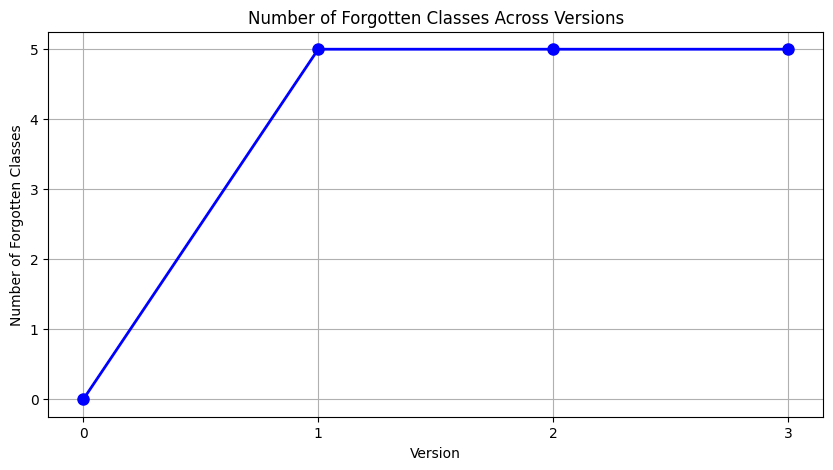

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

# 设置增量版本和类的数量
# 设置增量版本和类的数量
num_versions = 4  
num_classes = 37  # PET-37 共有 37 个类


# 验证每个版本 D_tr 的标签分布变化并统一纵坐标，并计算遗忘类的统计信息
def plot_forgotten_classes_analysis(base_dir):
    plt.style.use("default")
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    fig.suptitle("Forgotten Classes Analysis for Each Version")

    initial_labels = set(np.unique(load_d_tr(0, base_dir)[1]))
    forgotten_counts = []
    forgotten_classes_list = []

    # 计算每个版本中的遗忘类数量和遗忘类
    for version in range(num_versions):
        _, curr_labels = load_d_tr(version, base_dir)
        curr_classes = set(np.unique(curr_labels))

        forgotten_classes = initial_labels - curr_classes
        forgotten_counts.append(len(forgotten_classes))
        forgotten_classes_list.append(forgotten_classes)

        print(
            f"版本 {version}: 遗忘类数量: {len(forgotten_classes)}, 遗忘类: {forgotten_classes}"
        )

    max_count = max(forgotten_counts)  # 计算最大遗忘类数量，用于统一纵坐标

    # 绘制子图，展示每个版本的遗忘类数量和具体的遗忘类
    for version in range(num_versions):
        ax = axs[version // 2, version % 2]
        ax.bar(
            range(num_classes),
            [
                1 if i in forgotten_classes_list[version] else 0
                for i in range(num_classes)
            ],
            color="salmon",
        )
        ax.set_title(f"Version {version}")
        ax.set_xlabel("Class Index")
        ax.set_ylabel("Forgotten (1) or Not (0)")
        ax.set_xticks(range(0, num_classes, 10))
        ax.set_ylim(0, 1.5)  # 设定纵坐标统一范围，0 或 1 表示是否遗忘

    plt.tight_layout()
    fig.subplots_adjust(top=0.92)
    plt.show()

    # 绘制遗忘类数量的变化趋势
    plt.figure(figsize=(10, 5))
    plt.plot(
        range(num_versions),
        forgotten_counts,
        marker="o",
        color="b",
        linestyle="-",
        linewidth=2,
        markersize=8,
    )
    plt.title("Number of Forgotten Classes Across Versions")
    plt.xlabel("Version")
    plt.ylabel("Number of Forgotten Classes")
    plt.xticks(range(num_versions))
    plt.grid(True)
    plt.show()


# 定义数据集的路径
base_dir = "../data/pet-37/gen/nr_0.2_nt_asymmetric_balanced"
print("验证 base_dir 数据集:")
plot_forgotten_classes_analysis(base_dir)

结果解释

版本 0：没有被遗忘的类（如预期所示），因为版本 0 是初始数据集，包含所有的类，因此在图中所有类的标记为 0，即没有类被遗忘。

版本 1、2 和 3：版本 1、2 和 3 都显示相同数量的被遗忘类，并且都是相同的类（大约 16 个类）。这是合理的，因为版本 1 开始，某些类被遗忘，而版本 2 和 3 没有进一步遗忘更多的类。在可视化中，使用的条形图显示某些类别在每个版本中是否被遗忘（标记为 1）。所有被遗忘的类都在版本 1、2、3 中呈现出相似的图形，这表明这些类从版本 1 开始就被遗忘，并在后续版本中没有被重新引入。


### 验证噪声


In [3]:
!ls ../gen_dataset/

cifar-100_asymmetric_0.1_asymmetric_noisy_classes_detailed.json
cifar-100_asymmetric_0.1_asymmetric_noisy_classes_simple.json
cifar-100_asymmetric_0.2_asymmetric_noisy_classes_detailed.json
cifar-100_asymmetric_0.2_asymmetric_noisy_classes_simple.json
cifar-100_asymmetric_0.3_asymmetric_noisy_classes_detailed.json
cifar-100_asymmetric_0.3_asymmetric_noisy_classes_simple.json
cifar-100_asymmetric_0.5_asymmetric_noisy_classes_detailed.json
cifar-100_asymmetric_0.5_asymmetric_noisy_classes_simple.json
cifar-10-symmetric-0.1-symmetric_noisy_classes_detailed.json
cifar-10-symmetric-0.1-symmetric_noisy_classes_simple.json
cifar-10-symmetric-0.2-symmetric_noisy_classes_detailed.json
cifar-10-symmetric-0.2-symmetric_noisy_classes_simple.json
cifar-10-symmetric-0.3-symmetric_noisy_classes_detailed.json
cifar-10-symmetric-0.3-symmetric_noisy_classes_simple.json
cifar-10-symmetric-0.5-symmetric_noisy_classes_detailed.json
cifar-10-symmetric-0.5-symmetric_noisy_classes_simple.json
data
gen_cifar10

验证 base_dir 数据集:
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 1:
数据形状: (944, 3, 224, 224), 标签形状: (944,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 2:
数据形状: (765, 3, 224, 224), 标签形状: (765,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 3:
数据形状: (587, 3, 224, 224), 标签形状: (587,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 1:
数据形状: (944, 3, 224, 224), 标签形状: (944,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30 31 33 35]
版本 2:
数据形状: (765, 3, 224, 224), 标签形状: (765,

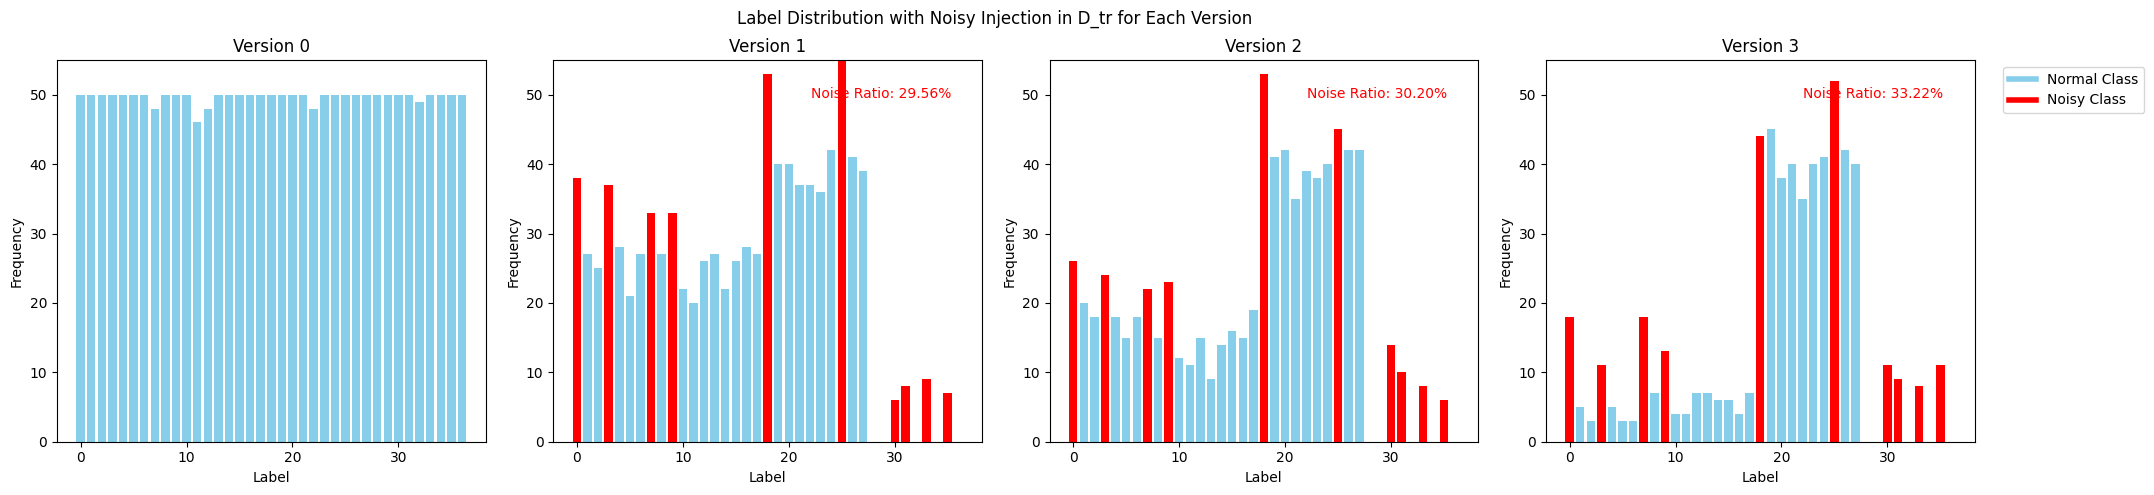

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import json

# 设置增量版本和类的数量
# 设置增量版本和类的数量
num_versions = 4  
num_classes = 37  # PET-37 共有 37 个类



# 分析和验证噪声注入
# 从导出的 json 文件加载噪声映射关系
def load_noisy_mapping(json_file_path):
    with open(json_file_path, "r") as f:
        noisy_mapping = json.load(f)
    return noisy_mapping


# 验证噪声注入的标签分布
def plot_noisy_label_distribution(base_dir, noisy_json_path):
    noisy_mapping = load_noisy_mapping(noisy_json_path)

    plt.style.use("default")
    fig, axs = plt.subplots(1, num_versions, figsize=(20, 5))
    fig.suptitle("Label Distribution with Noisy Injection in D_tr for Each Version")

    max_count = 0  # 初始化最大频率值

    # 计算所有版本中的最大频率值
    for version in range(num_versions):
        _, labels = load_d_tr(version, base_dir)
        _, counts = np.unique(labels, return_counts=True)
        max_count = max(max_count, max(counts))

    # 绘图并设置统一的纵坐标
    for version in range(num_versions):
        _, labels = load_d_tr(version, base_dir)
        unique, counts = np.unique(labels, return_counts=True)

        full_counts = np.zeros(num_classes)
        full_counts[unique] = counts  # 填充实际的计数值

        # 标注噪声标签
        noisy_labels = set()
        for mapping in noisy_mapping:
            noisy_labels.add(mapping[1])

        if version == 0:
            # 初始版本没有注入噪声，用单一颜色显示
            colors = ["skyblue" for label in range(num_classes)]
        else:
            # 其他版本用不同颜色标记噪声标签
            colors = []
            for label in range(num_classes):
                if label in unique:
                    colors.append("red" if label in noisy_labels else "skyblue")
                else:
                    colors.append("skyblue")

        axs[version].bar(range(num_classes), full_counts, color=colors)
        axs[version].set_title(f"Version {version}")
        axs[version].set_xlabel("Label")
        axs[version].set_ylabel("Frequency")
        axs[version].set_xticks(range(0, num_classes, 10))  # 保证横轴一致
        axs[version].set_ylim(0, max_count)  # 设置统一的纵坐标最大值

        # 添加噪声比例注释，仅在版本 1 到 3 中添加
        if version > 0:
            noisy_count = sum(
                [
                    counts[np.where(unique == label)[0][0]]
                    for label in noisy_labels
                    if label in unique
                ]
            )
            total_count = sum(counts)
            noise_ratio = noisy_count / total_count if total_count > 0 else 0
            axs[version].annotate(
                f"Noise Ratio: {noise_ratio:.2%}",
                xy=(0.6, 0.9),
                xycoords="axes fraction",
                fontsize=10,
                color="red",
            )

    plt.tight_layout()
    fig.subplots_adjust(top=0.88)  # 调整顶部以避免标题与图形重叠
    plt.legend(
        handles=[
            plt.Line2D([0], [0], color="skyblue", lw=4, label="Normal Class"),
            plt.Line2D([0], [0], color="red", lw=4, label="Noisy Class"),
        ],
        loc="upper left",
        bbox_to_anchor=(1.05, 1),
    )
    plt.show()


# 定义数据集的路径和噪声映射文件路径
base_dir_asy = "../data/pet-37/gen/nr_0.2_nt_asymmetric_balanced"
noisy_json_path_asy = (
    "../gen_dataset/pet-37-asymmetric-0.2-asymmetric_noisy_classes_simple.json"
)

print("验证 非对称噪声 base_dir 数据集:")
plot_noisy_label_distribution(base_dir_asy, noisy_json_path_asy)


非对称噪声结果解释

1. **版本 0**：

   - 版本 0 中的标签分布是相对均匀的，各个类的频率大致相同。
   - 图中以红色显示的标签是被标记为噪声的类别。在初始版本中，这些类别均被标注为噪声（虽然噪声还未注入），以便之后的版本中进行替换。

2. **版本 1、2 和 3**：

   - **噪声注入后的变化**：

     - 在版本 1、2 和 3 中，可以看到红色的噪声类开始出现较高的频率，表明这些类别的样本数量增加了，符合噪声注入的预期。
     - 在这些版本中，噪声样本的引入导致某些类别（以红色显示）数量显著增多，而其他类别的频率有所下降。这表明某些类的标签被替换为噪声类。

   - **逐版本变化**：
     - 从版本 1 到版本 3，可以观察到噪声类的样本频率逐步增加，而正常类的样本数量逐步减少。这符合噪声比例逐渐增大的设定，即随着版本的增加，更多的样本被注入噪声，导致噪声类的占比不断上升。

3. **说明**

- **噪声标记与颜色显示**：

  - 红色用于标记被注入噪声的类别，这些类别的数量逐渐增多，符合噪声注入的逻辑。
  - 每个版本的噪声类与正常类之间的颜色对比（红色 vs. 蓝色）明确区分了哪些类受到了噪声注入，帮助理解噪声的影响范围。

- **噪声比例的变化**：
  - 噪声类的增加呈现出累积的效果，表明在每个增量版本中，有更多的样本被替换为噪声类。这种变化趋势符合代码逻辑中逐版本增加噪声比例的设计目标。


验证 对称噪声 base_dir 数据集:
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 1:
数据形状: (944, 3, 224, 224), 标签形状: (944,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 34 36]
版本 2:
数据形状: (765, 3, 224, 224), 标签形状: (765,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 3:
数据形状: (587, 3, 224, 224), 标签形状: (587,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 0:
数据形状: (1839, 3, 224, 224), 标签形状: (1839,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
版本 1:
数据形状: (944, 3, 224, 224), 标签形状: (944,)
标签唯一值: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 

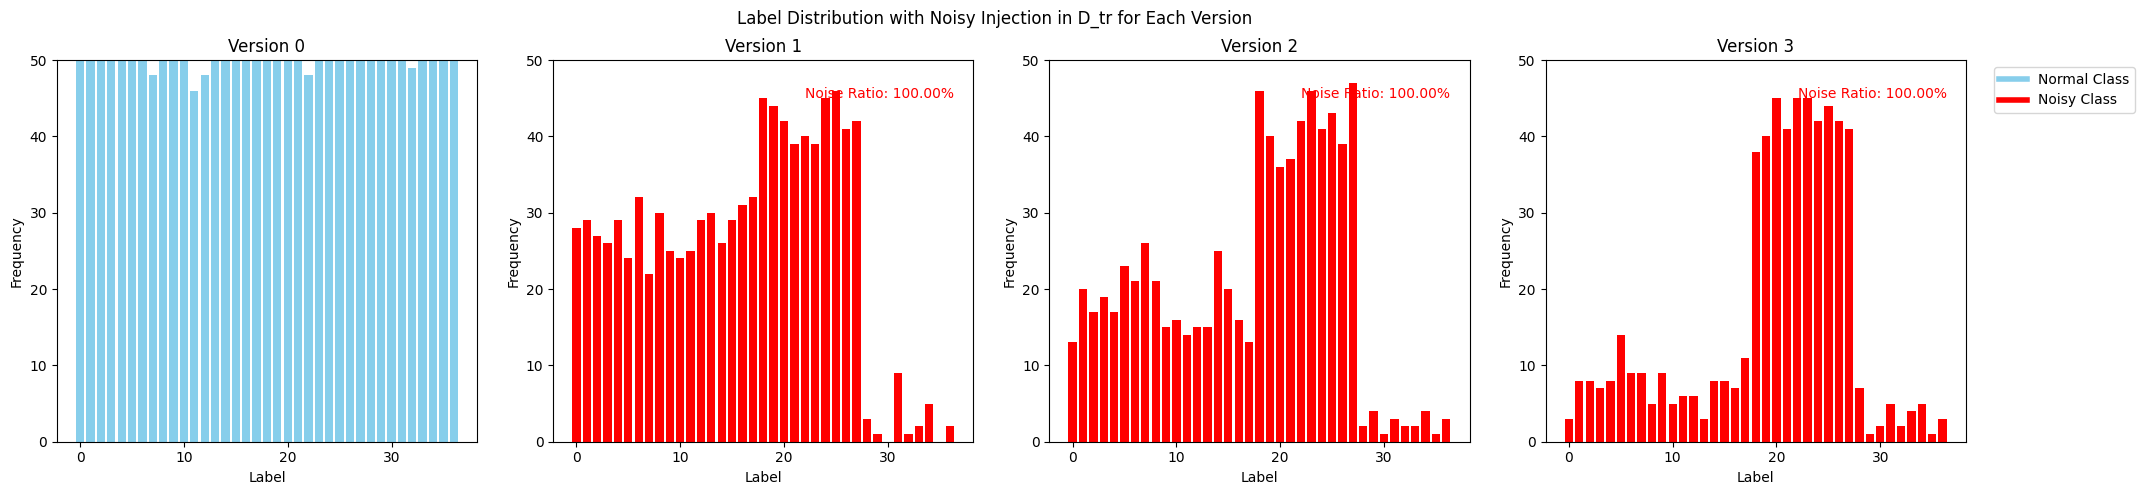

In [8]:
# 定义数据集的路径和噪声映射文件路径
base_dir_sy = "../data/pet-37/gen/nr_0.2_nt_symmetric_balanced"
noisy_json_path_sy = (
    "../gen_dataset/pet-37-symmetric-0.2-symmetric_noisy_classes_simple.json"
)

print("验证 对称噪声 base_dir 数据集:")
plot_noisy_label_distribution(base_dir_sy, noisy_json_path_sy)

对称噪声结果解释

### 图像可视化

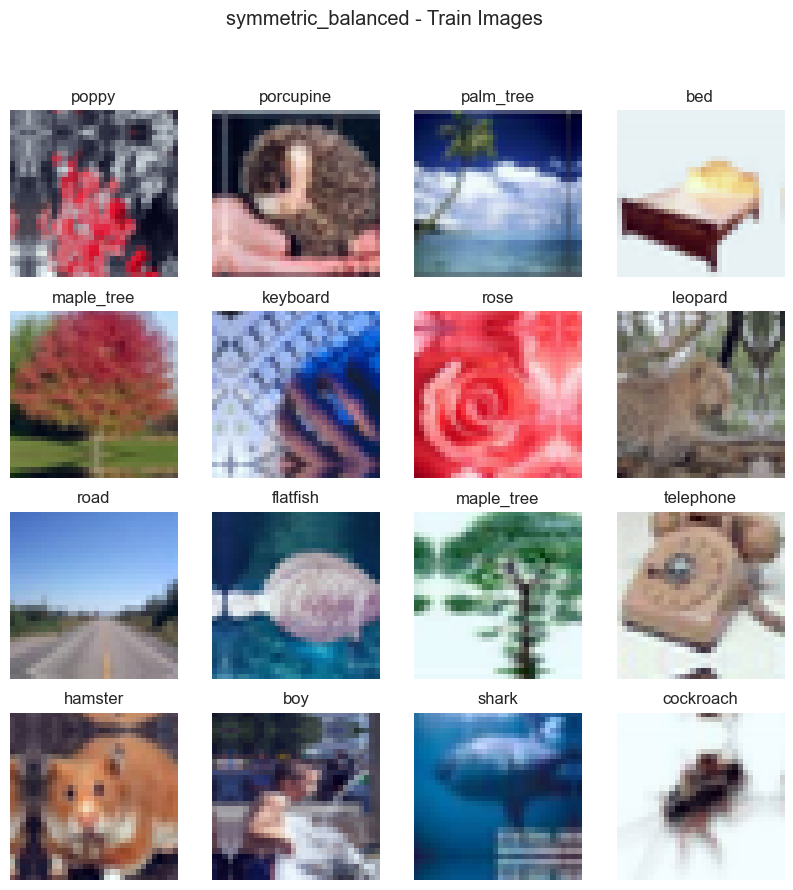

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 主题
sns.set(style="whitegrid")


# 加载 CIFAR-100 类别名称
def load_class_names(file_path):
    with open(file_path, "r") as f:
        class_names = [line.strip() for line in f.readlines()]
    return class_names


# 假设类别名称文件存储在 'configs/classes/cifar_100_classes.txt'
class_names = load_class_names("../configs/classes/cifar_100_classes.txt")


# 加载数据函数
def load_data(data_dir):
    data = {}
    data["train_data"] = np.load(f"{data_dir}/train_data.npy", allow_pickle=True)
    data["train_labels"] = np.load(f"{data_dir}/train_labels.npy", allow_pickle=True)

    data["test_data"] = np.load(f"{data_dir}/test_data.npy", allow_pickle=True)
    data["test_labels"] = np.load(f"{data_dir}/test_labels.npy", allow_pickle=True)

    data["D_0"] = np.load(f"{data_dir}/D_0.npy", allow_pickle=True)
    data["D_0_labels"] = np.load(f"{data_dir}/D_0_labels.npy", allow_pickle=True)

    data["D_inc_0"] = np.load(f"{data_dir}/D_inc_0_data.npy", allow_pickle=True)
    data["D_inc_0_labels"] = np.load(
        f"{data_dir}/D_inc_0_labels.npy", allow_pickle=True
    )

    data["D_a"] = np.load(f"{data_dir}/D_a.npy", allow_pickle=True)
    data["D_a_labels"] = np.load(f"{data_dir}/D_a_labels.npy", allow_pickle=True)

    data["D_tr_version_1"] = np.load(
        f"{data_dir}/D_tr_data_version_1.npy", allow_pickle=True
    )
    data["D_tr_labels_version_1"] = np.load(
        f"{data_dir}/D_tr_labels_version_1.npy", allow_pickle=True
    )
    data["D_tr_version_2"] = np.load(
        f"{data_dir}/D_tr_data_version_2.npy", allow_pickle=True
    )
    data["D_tr_labels_version_2"] = np.load(
        f"{data_dir}/D_tr_labels_version_2.npy", allow_pickle=True
    )
    data["D_tr_version_3"] = np.load(
        f"{data_dir}/D_tr_data_version_3.npy", allow_pickle=True
    )
    data["D_tr_labels_version_3"] = np.load(
        f"{data_dir}/D_tr_labels_version_3.npy", allow_pickle=True
    )

    return data


# 数据集路径字典
data_dirs = {
    # "symmetric": "../data/cifar-100/gen/nr_0.2_nt_symmetric",
    "symmetric_balanced": "../data/cifar-100/gen/nr_0.2_nt_symmetric_balanced",
    # "asymmetric": "../data/cifar-100/gen/nr_0.2_nt_asymmetric",
    # "asymmetric_balanced": "../data/cifar-100/gen/nr_0.2_nt_asymmetric_balanced",
}

# 加载所有数据集
datasets = {name: load_data(path) for name, path in data_dirs.items()}


# 可视化函数，显示类别名称而非编号
def visualize_images(images, labels, num_images=16, title="Image Grid"):
    num_images = min(num_images, len(images))
    indices = np.random.choice(len(images), num_images, replace=False)
    selected_images = images[indices]
    selected_labels = labels[indices]

    grid_size = int(np.sqrt(num_images))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten()

    for i in range(num_images):
        img = selected_images[i].transpose(1, 2, 0)  # 将图像维度转换为 HxWxC
        img = (img - img.min()) / (img.max() - img.min())  # 归一化图像到 [0, 1]

        class_name = class_names[selected_labels[i]]  # 将标签转换为类名
        axes[i].imshow(img)
        axes[i].set_title(f"{class_name}")
        axes[i].axis("off")

    plt.suptitle(title)
    plt.show()


# 使用某个数据集进行可视化
dataset_name = "symmetric_balanced"  # 选择对应的数据集键名
dataset = datasets[dataset_name]

# 可视化训练集中的部分图像和标签
visualize_images(
    dataset["train_data"],
    dataset["train_labels"],
    num_images=16,
    title=f"{dataset_name} - Train Images",
)
# visualize_images(
#     dataset["D_0"],
#     dataset["D_0_labels"],
#     num_images=16,
#     title=f"{dataset_name} - D_0 Images",
# )

# visualize_images(
#     dataset["D_inc_0"],
#     dataset["D_inc_0_labels"],
#     num_images=16,
#     title=f"{dataset_name} - D_inc_0 Images",
# )
# visualize_images(
#     dataset["D_tr_version_1"],
#     dataset["D_tr_labels_version_1"],
#     num_images=16,
#     title=f"{dataset_name} - D_tr_version_1 Images",
# )

### 热力图 - 1


对称噪声验证：
Version 1: original_labels size = 25000, noisy_labels size = 14986
Mismatch detected in version 1: Adjusting sizes
Version 2: original_labels size = 25000, noisy_labels size = 12514
Mismatch detected in version 2: Adjusting sizes


/tmp/ipykernel_217127/3043773983.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_labels = torch.load(original_labels_path).numpy()  # 使用 torch.load 并转换为 numpy


Version 3: original_labels size = 25000, noisy_labels size = 10043
Mismatch detected in version 3: Adjusting sizes


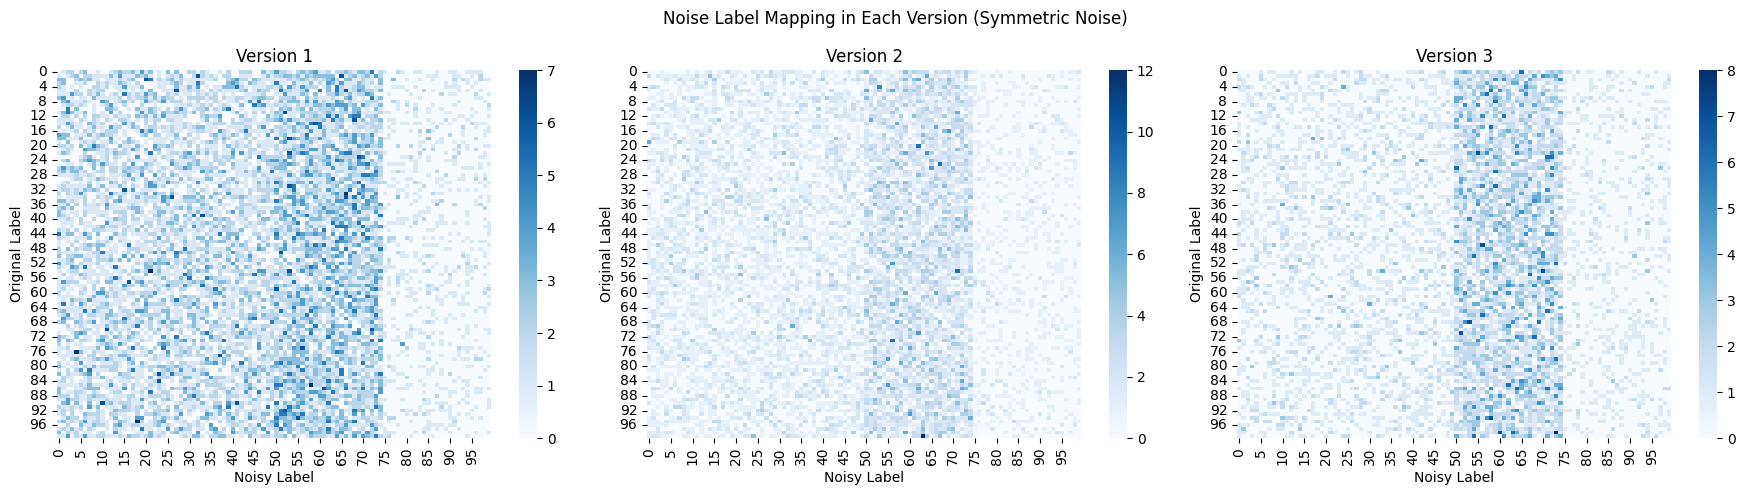

非对称噪声验证：
Version 1: original_labels size = 25000, noisy_labels size = 14986
Mismatch detected in version 1: Adjusting sizes


/tmp/ipykernel_217127/3043773983.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  original_labels = torch.load(original_labels_path).numpy()  # 使用 torch.load 并转换为 numpy


Version 2: original_labels size = 25000, noisy_labels size = 12514
Mismatch detected in version 2: Adjusting sizes
Version 3: original_labels size = 25000, noisy_labels size = 10043
Mismatch detected in version 3: Adjusting sizes


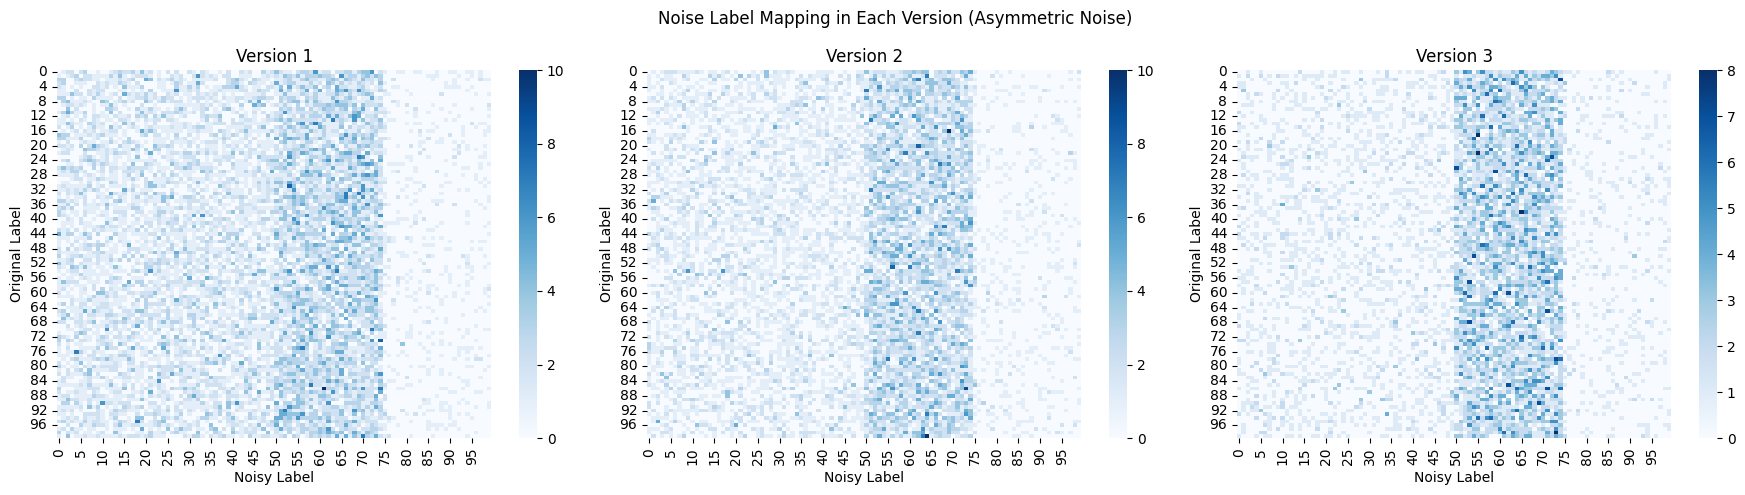

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# 定义数据集的路径
base_dir_asym = "../data/cifar-100/gen/nr_0.2_nt_asymmetric"
base_dir_sym = "../data/cifar-100/gen/nr_0.2_nt_symmetric"
num_versions = 3  # 假设有3个增量版本
num_classes = 100  # CIFAR-100 共有100个类
num_replay_samples = 2500  # D_a 包含的样本数


# 加载每个版本的原始标签和噪声标签
def load_labels(version, base_dir):
    original_labels_path = os.path.join(
        base_dir, f"D_inc_0_labels.npy"
    )  # 固定增量标签文件名
    noisy_labels_path = os.path.join(base_dir, f"D_tr_labels_version_{version}.npy")

    try:
        original_labels = torch.load(
            original_labels_path
        ).numpy()  # 使用 torch.load 并转换为 numpy
        noisy_labels = torch.load(noisy_labels_path).numpy()

        # 调试输出标签的大小
        print(
            f"Version {version}: original_labels size = {len(original_labels)}, noisy_labels size = {len(noisy_labels)}"
        )

        # 剔除重放数据 D_a 的标签部分
        noisy_labels = noisy_labels[num_replay_samples:]  # 从增量部分开始

        # 确保 noisy_labels 和 original_labels 大小一致
        if len(noisy_labels) != len(original_labels):
            print(f"Mismatch detected in version {version}: Adjusting sizes")
            if len(noisy_labels) > len(original_labels):
                noisy_labels = noisy_labels[: len(original_labels)]
            else:
                original_labels = original_labels[: len(noisy_labels)]

        return original_labels, noisy_labels
    except Exception as e:
        print(f"Error loading labels for version {version}: {e}")
        return None, None


# 计算并可视化对称噪声和非对称噪声的效果
def plot_noise_effect(base_dir, noise_type):
    plt.style.use("default")
    fig, axs = plt.subplots(1, num_versions, figsize=(18, 5))
    fig.suptitle(f"Noise Label Mapping in Each Version ({noise_type} Noise)")

    for version in range(1, num_versions + 1):
        original_labels, noisy_labels = load_labels(version, base_dir)

        if original_labels is None or noisy_labels is None:
            continue  # 如果加载失败，则跳过该版本

        # 找到那些被噪声替换的样本
        noise_mask = original_labels != noisy_labels  # 标签不同的部分即为噪声
        original_labels_noisy = original_labels[noise_mask]
        noisy_labels_only = noisy_labels[noise_mask]

        # 构建噪声标签的映射矩阵
        noise_mapping_matrix = np.zeros(
            (num_classes, num_classes)
        )  # 记录每个类的噪声标签分布
        for orig, noisy in zip(original_labels_noisy, noisy_labels_only):
            noise_mapping_matrix[orig, noisy] += 1

        # 绘制热力图展示噪声标签的映射
        sns.heatmap(noise_mapping_matrix, ax=axs[version - 1], cmap="Blues", cbar=True)
        axs[version - 1].set_title(f"Version {version}")
        axs[version - 1].set_xlabel("Noisy Label")
        axs[version - 1].set_ylabel("Original Label")

    plt.tight_layout()
    plt.show()


# 验证对称噪声效果
print("对称噪声验证：")
plot_noise_effect(base_dir_sym, "Symmetric")

# 验证非对称噪声效果
print("非对称噪声验证：")
plot_noise_effect(base_dir_asym, "Asymmetric")

### 热力图 - 2

对称噪声验证：
Version 1: original_labels size = 25000, noisy_labels size = 21317
Mismatch detected in version 1: Adjusting sizes
Version 2: original_labels size = 25000, noisy_labels size = 18844
Mismatch detected in version 2: Adjusting sizes
Version 3: original_labels size = 25000, noisy_labels size = 16371
Mismatch detected in version 3: Adjusting sizes


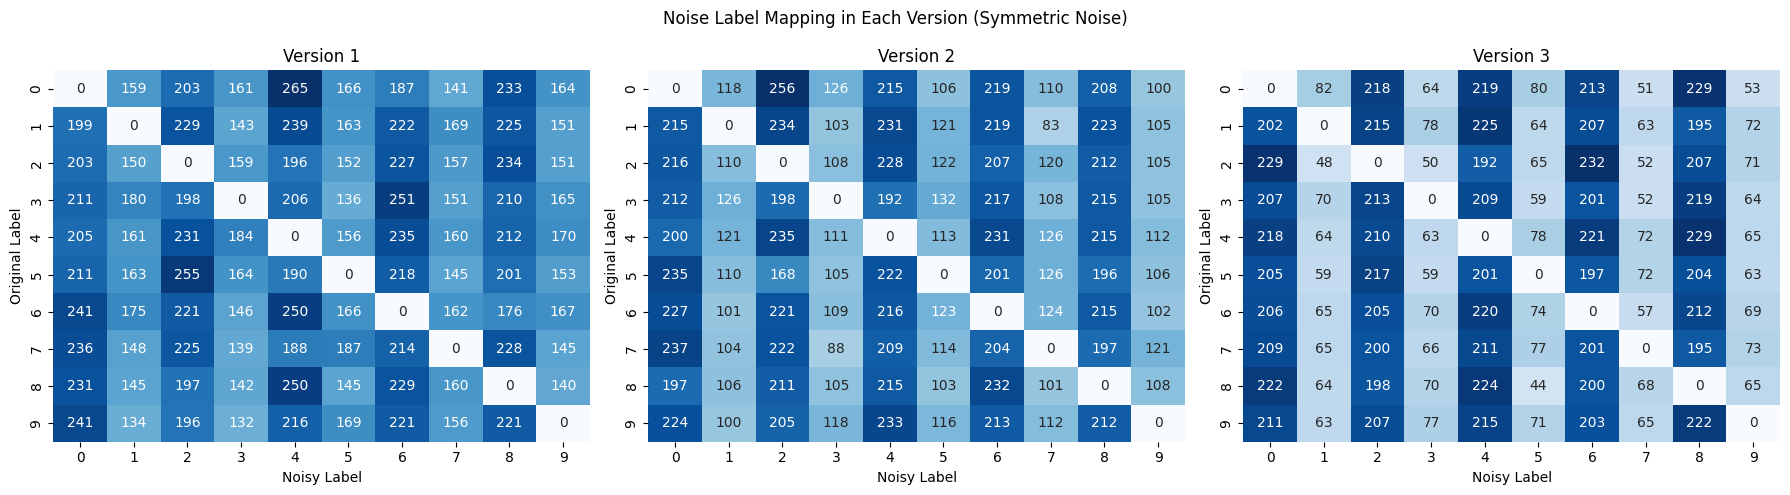

非对称噪声验证：
Error loading labels for version 1: [Errno 2] No such file or directory: '../data/cifar-10/gen/nr_0.2_nt_asymmetric/D_inc_0_labels.npy'
Error loading labels for version 2: [Errno 2] No such file or directory: '../data/cifar-10/gen/nr_0.2_nt_asymmetric/D_inc_0_labels.npy'
Error loading labels for version 3: [Errno 2] No such file or directory: '../data/cifar-10/gen/nr_0.2_nt_asymmetric/D_inc_0_labels.npy'


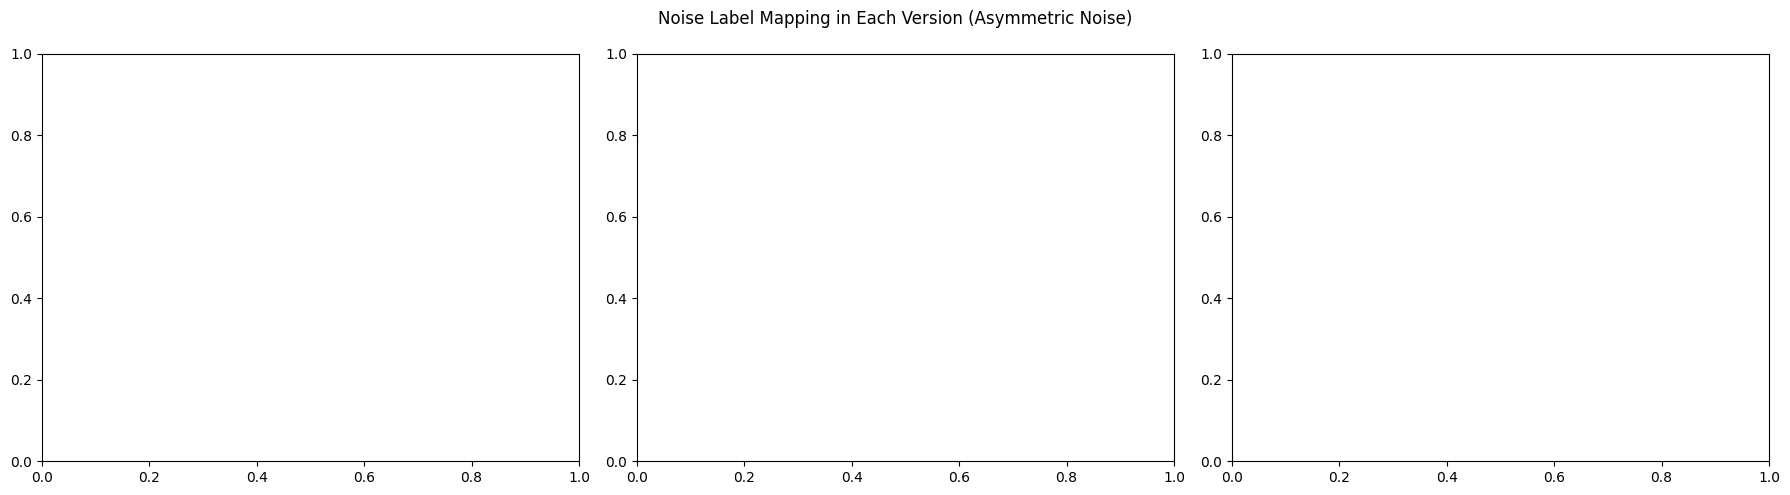

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# 定义数据集的路径
base_dir_1 = "../data/cifar-10/gen/nr_0.2_nt_asymmetric"
base_dir_2 = "../data/cifar-10/gen/nr_0.2_nt_symmetric"
num_versions = 3  # 假设有3个增量版本
num_classes = 10  # CIFAR-10 共有10个类
num_replay_samples = 2500  # D_a 包含的样本数


# 加载每个版本的原始标签和噪声标签
def load_labels(version, base_dir):
    original_labels_path = os.path.join(
        base_dir, f"D_inc_0_labels.npy"
    )  # 固定增量标签文件名
    noisy_labels_path = os.path.join(base_dir, f"D_tr_labels_version_{version}.npy")

    try:
        original_labels = torch.load(
            original_labels_path
        ).numpy()  # 使用 torch.load 并转换为 numpy
        noisy_labels = torch.load(noisy_labels_path).numpy()

        # 调试输出标签的大小
        print(
            f"Version {version}: original_labels size = {len(original_labels)}, noisy_labels size = {len(noisy_labels)}"
        )

        # 剔除重放数据 D_a 的标签部分
        noisy_labels = noisy_labels[num_replay_samples:]  # 从增量部分开始

        # 确保 noisy_labels 和 original_labels 大小一致
        if len(noisy_labels) != len(original_labels):
            print(f"Mismatch detected in version {version}: Adjusting sizes")
            if len(noisy_labels) > len(original_labels):
                noisy_labels = noisy_labels[: len(original_labels)]
            else:
                original_labels = original_labels[: len(noisy_labels)]

        return original_labels, noisy_labels
    except Exception as e:
        print(f"Error loading labels for version {version}: {e}")
        return None, None


# 计算并可视化对称噪声和非对称噪声的效果
def plot_noise_effect(base_dir, noise_type):
    plt.style.use("default")
    fig, axs = plt.subplots(1, num_versions, figsize=(18, 5))
    fig.suptitle(f"Noise Label Mapping in Each Version ({noise_type} Noise)")

    for version in range(1, num_versions + 1):
        original_labels, noisy_labels = load_labels(version, base_dir)

        if original_labels is None or noisy_labels is None:
            continue  # 如果加载失败，则跳过该版本

        # 找到那些被噪声替换的样本
        noise_mask = original_labels != noisy_labels  # 标签不同的部分即为噪声
        original_labels_noisy = original_labels[noise_mask]
        noisy_labels_only = noisy_labels[noise_mask]

        # 构建噪声标签的映射矩阵
        noise_mapping_matrix = np.zeros(
            (num_classes, num_classes)
        )  # 记录每个类的噪声标签分布
        for orig, noisy in zip(original_labels_noisy, noisy_labels_only):
            noise_mapping_matrix[orig, noisy] += 1

        # 绘制热力图展示噪声标签的映射
        sns.heatmap(
            noise_mapping_matrix,
            ax=axs[version - 1],
            cmap="Blues",
            annot=True,
            fmt=".0f",
            cbar=False,
        )
        axs[version - 1].set_title(f"Version {version}")
        axs[version - 1].set_xlabel("Noisy Label")
        axs[version - 1].set_ylabel("Original Label")

    plt.tight_layout()
    plt.show()


# 验证对称噪声效果
print("对称噪声验证：")
plot_noise_effect(base_dir_2, "Symmetric")

# 验证非对称噪声效果
print("非对称噪声验证：")
plot_noise_effect(base_dir_1, "Asymmetric")